In [1]:
import pandas as pd
import matplotlib.pyplot as Plt
import seaborn as sb
import sklearn as sk
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Lọc dữ liệu dảm bảo xóa những dữ liệu bị trùng lặp

In [2]:
df = pd.read_csv('../data/heart.csv')
df = df.drop_duplicates()
df.to_csv('../data/heart_new.csv', encoding='utf-8', index=False)
df = pd.read_csv('../data/heart_new.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Check thông tin các cột

In [3]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Check giá trị cột kết quả

In [4]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

### Phân tích dữ liệu 


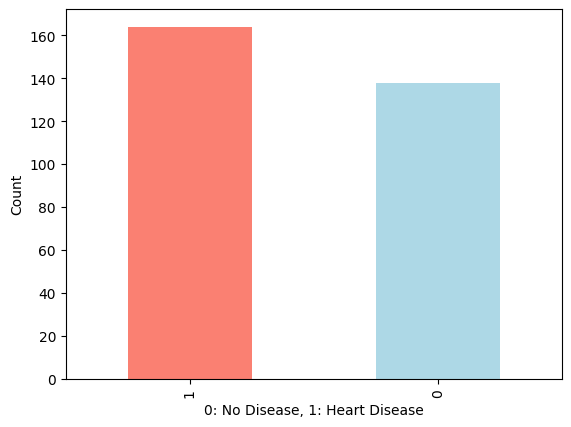

In [5]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
Plt.xlabel('0: No Disease, 1: Heart Disease')
Plt.ylabel('Count');

In [6]:
print(df['sex'].value_counts())
pd.crosstab(df['sex'], df['target'])
print("% nữ bị bệnh: ",72/96*100)
print("% nam bị bệnh: ",92/206*100)

1    206
0     96
Name: sex, dtype: int64
% nữ bị bệnh:  75.0
% nam bị bệnh:  44.66019417475729


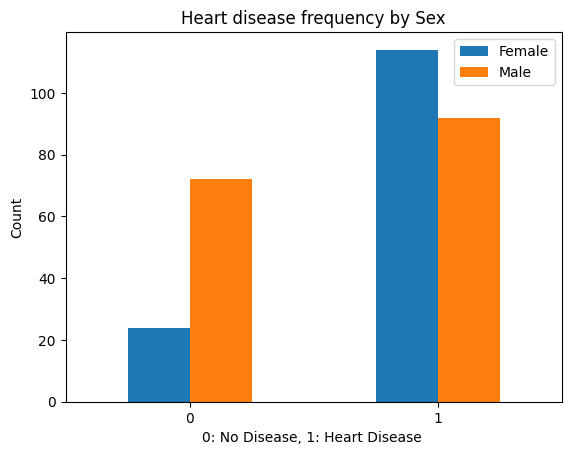

In [7]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
Plt.title('Heart disease frequency by Sex')
Plt.xlabel('0: No Disease, 1: Heart Disease ')
Plt.ylabel('Count')
Plt.legend(['Female', 'Male']);
Plt.xticks(rotation=0);

### Tạo features gồm những cột lấy làm giá trị X

In [8]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

### Xây dựng tập giá trị x và y

In [36]:
y = df['target']
x = df.drop('target', axis=1)
x.head()

0      0
1      0
2      0
3      0
4      0
      ..
297    1
298    1
299    0
300    0
301    0
Name: target, Length: 302, dtype: int64
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [38]:
#y = y.values.reshape(-1,1)

### Phân chia dữ liệu:
  - X thành X_train và X_test
  - Y thành Y_train và Y_test


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)
# random_state là một số nguyên được sử dụng để khởi tạo trạng thái ngẫu nhiên, đảm bảo rằng việc chia dữ liệu sẽ luôn giống nhau mỗi khi chạy lại mã. Thông thường quy ước sử dụng random_state = 42

### Khởi tạo model Knn và check giá trị n_neighbors tối ưu


In [40]:
for i in range(2,11) :
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    print("n_neighbors = ", i ,"  accuracy_score :" ,accuracy_score(Y_test, y_pred.round()))

n_neighbors =  2   accuracy_score : 0.6052631578947368
n_neighbors =  3   accuracy_score : 0.6710526315789473
n_neighbors =  4   accuracy_score : 0.6447368421052632
n_neighbors =  5   accuracy_score : 0.631578947368421
n_neighbors =  6   accuracy_score : 0.631578947368421
n_neighbors =  7   accuracy_score : 0.631578947368421
n_neighbors =  8   accuracy_score : 0.6447368421052632
n_neighbors =  9   accuracy_score : 0.618421052631579
n_neighbors =  10   accuracy_score : 0.6052631578947368


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
[0.66666667 0.33333333 0.66666667 1.         0.66666667 0.
 0.66666667 1.         1.         1.         0.33333333 0.33333333
 0.66666667 0.33333333 0.66666667 0.         1.         1.
 1.         0.66666667 0.66666667 0.66666667 0.33333333 0.66666667
 0.66666667 0.         1.         1.         0.33333333 0.
 0.66666667 1.         1.         0.66666667 1.         0.66666667
 1.         0.66666667 1.         0.33333333 1.         0.66666667
 1.         0.66666667 0.33333333 0.33333333 1.         0.
 0.33333333 1.         0.66666667 0.33333333 0.         0.66666667
 0.33333333 0.         0.66666667 0.33333333 0.66666667 1.
 1.         1.         0.         0.66666667 1.         0.33333333
 0.66666667 0.         0.33333333 0.66666667 0.33333333 0.66666667
 1.         1.         0.33333333 0.        ]


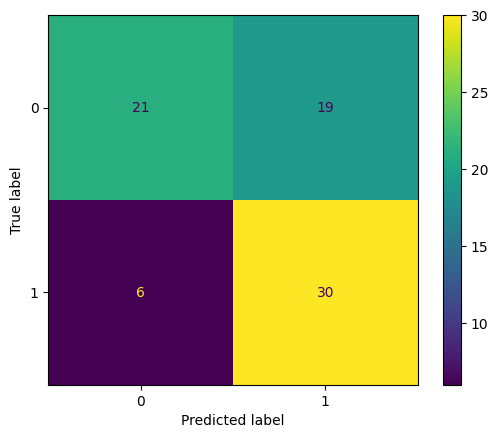

In [41]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, Y_train)
print(type(X_train),type(Y_train))
y_pred = knn.predict(X_test)
print(y_pred)
cm = confusion_matrix(Y_test, y_pred.round())
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred.round())

In [42]:
for i in y_pred :
    print(type(i))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

### Lưu lại model knn


In [43]:
import pickle
filename = "../model/knn.pickle"
pickle.dump(knn, open(filename, "wb"))

### Khởi tạo model Svm



### Dưới đây là mô tả các thông số chính:
    1. kernel: Kernel function được sử dụng trong mô hình. Trong trường hợp này, giá trị là 'rbf' để sử dụng Radial basis function.
    2. C: Tham số điều chỉnh độ ràng buộc (regularization) của mô hình. Giá trị càng lớn, độ ràng buộc càng yếu. Mặc định là 1.0.
    3. gamma: Tham số trong kernel RBF. Giá trị 'scale' sử dụng 1 / (n_features * X.var()) làm giá trị gamma, và 'auto' sử dụng 1 / n_features.
    4. shrinking: Xác định xem liệu thuật toán sẽ sử dụng phép co rút hay không để cải thiện tốc độ huấn luyện. Mặc định là True.
    5. probability: Xác định xem liệu mô hình sẽ tính toán xác suất dự đoán. Mặc định là False.
    6. tol: Số dấu chấm động tuyệt đối để xác định điều kiện dừng. Mặc định là 0.001.
    7. cache_size: Kích thước bộ nhớ cache (MB) để lưu trữ ma trận kernel. Mặc định là 200.
    8. class_weight: Trọng số được áp dụng cho các lớp trong bài toán phân loại không cân bằng. Mặc định là None.
    9. verbose: Xác định xem liệu thuật toán có in ra thông tin quá trình huấn luyện hay không. Mặc định là False.
    10. max_iter: Số lượng tối đa các vòng lặp cho phép. Mặc định là -1, tức là không có giới hạn.
    11. decision_function_shape: Xác định cách tính hàm quyết định đa lớp ('ovr' cho một vs. một hoặc 'ovo' cho một vs. một).
    12. break_ties: Xác định xem liệu thuật toán có phá vỡ sự cân bằng kết quả dự đoán khi xảy ra s

In [18]:

svm = SVC(kernel='rbf', C=1.0, gamma='scale', shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=42)
svm.fit(X_train,Y_train)
y_pred_svm = svm.predict(X_test)
print(100*accuracy_score(Y_test, y_pred_svm))

55.26315789473685


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y_pred_svm

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

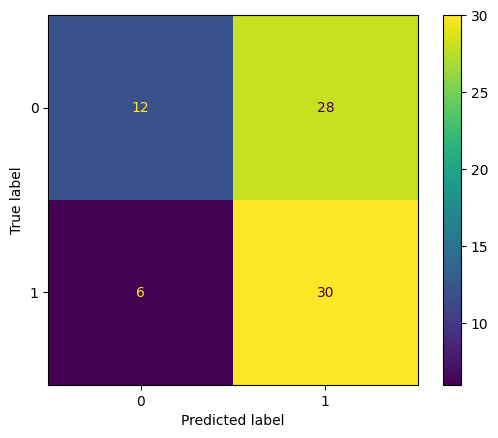

In [19]:
cm = confusion_matrix(Y_test, y_pred_svm)
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_svm)

### Lưu lại model svm

In [23]:
import pickle
filename = "../model/svm.pickle"
pickle.dump(svm, open(filename, "wb"))
